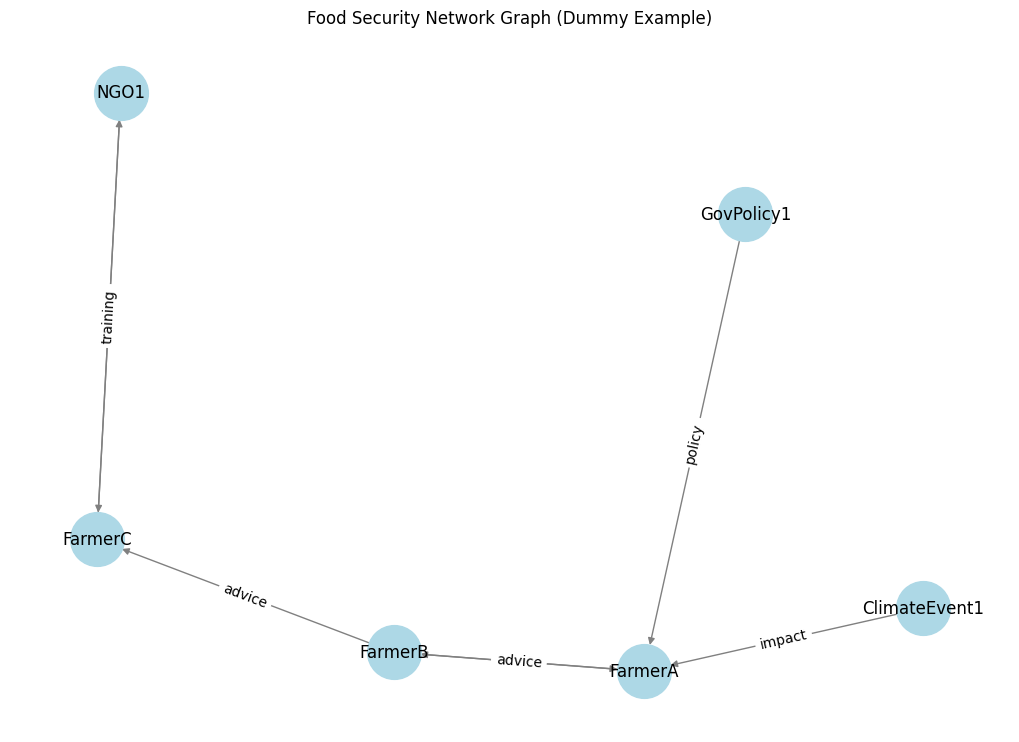


Centrality Metrics:
            Node  DegreeCentrality  BetweennessCentrality  ClosenessCentrality
0        FarmerA               0.8                    0.3             0.600000
1        FarmerB               0.6                    0.3             0.360000
2        FarmerC               0.6                    0.2             0.500000
3           NGO1               0.4                    0.0             0.357143
4  ClimateEvent1               0.2                    0.0             0.000000
5     GovPolicy1               0.2                    0.0             0.000000


In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create an edge list (dummy data)
# Each row represents a connection (e.g., advice, influence, impact)
data = {
    'Source': ['FarmerA', 'FarmerB', 'FarmerC', 'NGO1', 'ClimateEvent1', 'GovPolicy1', 'FarmerB'],
    'Target': ['FarmerB', 'FarmerC', 'NGO1', 'FarmerC', 'FarmerA', 'FarmerA', 'FarmerA'],
    'Relationship': ['advice', 'advice', 'training', 'training', 'impact', 'policy', 'advice'],
    'Weight': [1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# Step 2: Create a directed graph
G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr=True, create_using=nx.DiGraph())

# Step 3: Visualize the graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', edge_color='gray', arrows=True)
edge_labels = nx.get_edge_attributes(G, 'Relationship')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Food Security Network Graph (Dummy Example)")
plt.show()

# Step 4: Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

# Display results
centrality_df = pd.DataFrame({
    'Node': list(degree_centrality.keys()),
    'DegreeCentrality': list(degree_centrality.values()),
    'BetweennessCentrality': list(betweenness.values()),
    'ClosenessCentrality': list(closeness.values())
})

print("\nCentrality Metrics:")
print(centrality_df.sort_values(by='DegreeCentrality', ascending=False))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:006.9 MB/s eta 0:00:01


,Source,Target,Relationship,Weight
0,FarmerA,FarmerB,advice,1
1,FarmerB,FarmerC,advice,1
2,FarmerC,NGO1,training,1
3,NGO1,FarmerC,training,1
4,ClimateEvent1,FarmerA,impact,1
5,GovPolicy1,FarmerA,policy,1
6,FarmerB,FarmerA,advice,1


In [6]:
G